# **Ex3**

## Names and IDs

1.   Coral Yagud 208635490
2.   Lior Biton 209502079

## 1. Fuel efficiency price prediction (35 points)
In this section we will use regression tree model for predicting the fuel efficiency for different cars


The features data available here:
https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv

The labels are here:
https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv


In [1]:
import numpy as np
# load the data
import pandas as pd
y = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/labels.csv')
X = pd.read_csv(r'https://raw.githubusercontent.com/EyalHadad/Files/main/data.csv')


### EDA visuallization (5pts)

Explore the data. What features are meaningful? what are the correlated features? display statistcs about the data itself including it's value ranges.

In [2]:
# EDA
# First few rows of the data to understand the structure
print("First few rows of labels data:")
print(y.head())
print("\nFirst few rows of features data:")
print(X.head())

First few rows of labels data:
    MPG
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0

First few rows of features data:
   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        8.0         307.0       130.0     NaN          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        NaN         318.0       150.0  3436.0          11.0         NaN   
3        8.0         304.0         NaN     NaN           NaN        70.0   
4        8.0         302.0         NaN  3449.0          10.5        70.0   

  Origin  
0    USA  
1    USA  
2    NaN  
3    NaN  
4    USA  


In [3]:
# Check for missing values in each column
missing_values_per_column_labels = y.isnull().sum()
missing_values_per_column_features = X.isnull().sum()

# Display results
print("\nMissing values in labels data per column:")
print(missing_values_per_column_labels)
print("\nMissing values in features data per column:")
print(missing_values_per_column_features)

num_records_features = len(X)
print("\nNumber of records in features data:", num_records_features)


Missing values in labels data per column:
MPG    0
dtype: int64

Missing values in features data per column:
Cylinders        91
Displacement    110
Horsepower      114
Weight          105
Acceleration     93
Model Year       87
Origin           85
dtype: int64

Number of records in features data: 398


In [4]:
# Convert the "origin" feature into dummy variables
X_new = pd.get_dummies(X, columns=['Origin'])

# Display the first few rows to verify the transformation
print(X_new.head())

   Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0        8.0         307.0       130.0     NaN          12.0        70.0   
1        8.0         350.0       165.0  3693.0          11.5        70.0   
2        NaN         318.0       150.0  3436.0          11.0         NaN   
3        8.0         304.0         NaN     NaN           NaN        70.0   
4        8.0         302.0         NaN  3449.0          10.5        70.0   

   Origin_Europe  Origin_Japan  Origin_USA  
0              0             0           1  
1              0             0           1  
2              0             0           0  
3              0             0           0  
4              0             0           1  


In [5]:
# Display statistics about the data
print("\nStatistics about labels data:")
print(y.describe().round(1))
print("\nStatistics about features data:")
print(X_new.describe().round(1))


Statistics about labels data:
         MPG
count  398.0
mean    23.5
std      7.8
min      9.0
25%     17.5
50%     23.0
75%     29.0
max     46.6

Statistics about features data:
       Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
count      307.0         288.0       284.0   293.0         305.0       311.0   
mean         5.5         199.6       105.1  2975.2          15.6        76.1   
std          1.7         103.6        38.5   843.0           2.8         3.7   
min          3.0          68.0        46.0  1613.0           8.0        70.0   
25%          4.0         105.0        75.0  2234.0          13.7        73.0   
50%          5.0         156.0        95.0  2795.0          15.5        76.0   
75%          8.0         302.0       130.0  3620.0          17.5        79.0   
max          8.0         455.0       225.0  4997.0          24.6        82.0   

       Origin_Europe  Origin_Japan  Origin_USA  
count          398.0         398.0       398.0  


In [6]:
# Display value ranges for each column
print("Value Ranges:")
for column in X_new.columns:
  print(f"{column}: {X_new[column].min()} - {X_new[column].max()}")

Value Ranges:
Cylinders: 3.0 - 8.0
Displacement: 68.0 - 455.0
Horsepower: 46.0 - 225.0
Weight: 1613.0 - 4997.0
Acceleration: 8.0 - 24.6
Model Year: 70.0 - 82.0
Origin_Europe: 0 - 1
Origin_Japan: 0 - 1
Origin_USA: 0 - 1


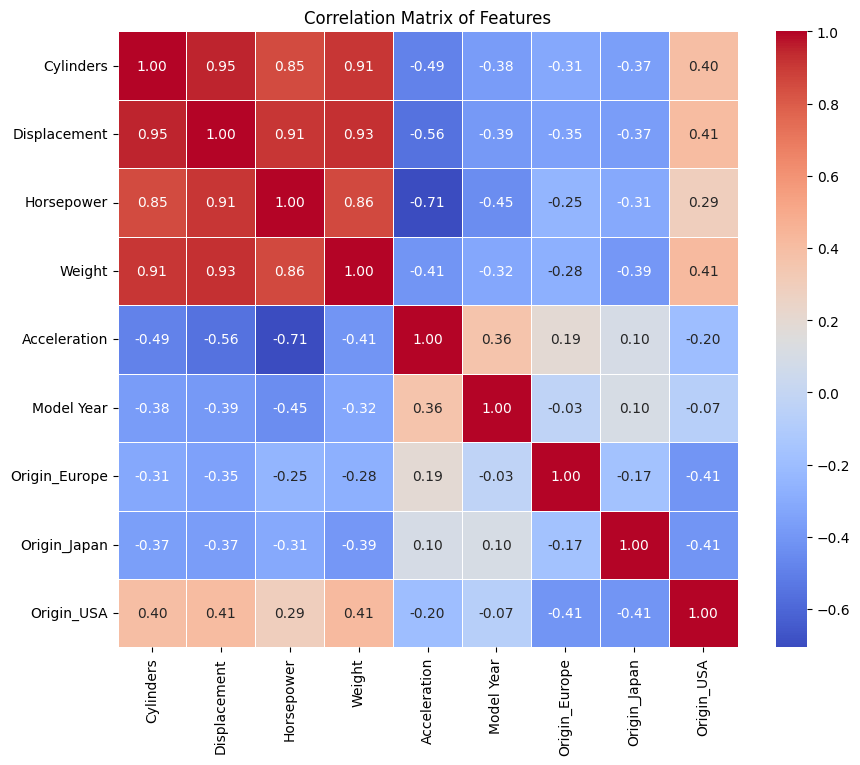

In [7]:
# Visualize the correlation matrix to identify correlated features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_new.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

### EDA insights (5pts)

What are you insgits based on the previuse visualization?

In [8]:
# Graph 2 -
# Identify highly correlated features
highly_correlated_pairs = (corr_matrix.abs() > 0.7) & (corr_matrix.abs() < 1.0)
highly_correlated_features = []

for col in highly_correlated_pairs.columns:
    correlated_cols = list(highly_correlated_pairs.index[highly_correlated_pairs[col]])
    if len(correlated_cols) > 0:
        highly_correlated_features.append((col, correlated_cols))

print("\nHighly Correlated Features:")
for feature_pair in highly_correlated_features:
    feature1 = feature_pair[0]
    correlated_features = feature_pair[1]
    print(f"{feature1} with {', '.join(correlated_features)}")



Highly Correlated Features:
Cylinders with Displacement, Horsepower, Weight
Displacement with Cylinders, Horsepower, Weight
Horsepower with Cylinders, Displacement, Weight, Acceleration
Weight with Cylinders, Displacement, Horsepower
Acceleration with Horsepower


Correlation of Features with MPG Label:
               Correlation with MPG
Cylinders                 -0.779575
Displacement              -0.806347
Horsepower                -0.777137
Weight                    -0.837505
Acceleration               0.422525
Model Year                 0.588143
Origin_Europe              0.234404
Origin_Japan               0.405567
Origin_USA                -0.402869


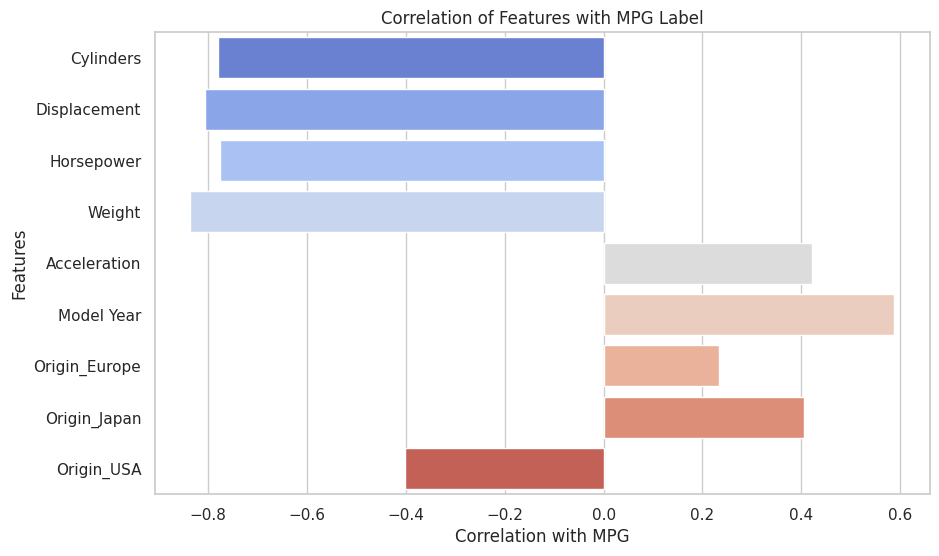

In [9]:
# Calculate the correlation between features and the MPG label
corr_with_mpg = X_new.corrwith(y['MPG'])

# Convert the correlation values to a DataFrame
corr_df = pd.DataFrame(corr_with_mpg, columns=['Correlation with MPG'])

# Display the DataFrame
print("Correlation of Features with MPG Label:")
print(corr_df)

# Set the style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_mpg.values, y=corr_with_mpg.index, hue=corr_with_mpg.index, palette="coolwarm", dodge=False, legend=False)
plt.title('Correlation of Features with MPG Label')
plt.xlabel('Correlation with MPG')
plt.ylabel('Features')
plt.show()

### Preprocessing (5pts)

Apply preprocessing according to your data, handle missing values and split the dataset into train-test as well.
Explain the reason for all methods that you apply.

Make sure that it doesn't affect the data charateristics. Which means that the correlations stay the same (if it was not corelated before it shouldn't be now).

In [10]:
# Preprocessing -
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Handling missing values with KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_filled_knn = imputer.fit_transform(X_new)
X_filled_knn_df = pd.DataFrame(X_filled_knn, columns=X_new.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filled_knn_df, y, test_size=0.2, random_state=42)

# Verify train-test split sizes
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])



Train set size: 318
Test set size: 80


**Data handling changes:**
1. **KNN** - The method of handling missing values using k-Nearest Neighbors imputation, specifically through KNNImputer, is chosen because the dataset contains a significant number of missing values across multiple features. Deleting rows with missing values might lead to a substantial loss of data, which is undesirable, especially in datasets with limited samples. KNN imputation is selected as a method to handle missing values because it can estimate missing values based on the values of nearest neighbors, allowing us to retain valuable information while addressing the issue of missing data..

2. **Dummy Encoding the 'Origin' Column:** The 'Origin' column contains categorical data representing the country of origin of the vehicles. Machine learning models generally require numerical input, so categorical data often need to be converted into a numerical format. Dummy encoding is a standard technique to transform categorical variables into a set of binary variables (0 or 1). Each category becomes a new column, where the presence of a category is marked with a 1, and its absence is marked with a 0. This allows the model to use the category as a feature without assuming an ordinal relationship between different categories. Since there is no inherent order among the countries of origin, using dummy encoding is preferred.

3. **Splitting the Dataset into Training and Testing Sets:**
* 80% Train: The larger portion of the data is used to train the model, allowing it to learn from a more comprehensive set of examples.
* 20% Test: A smaller portion is reserved for testing, which is sufficient for evaluation purposes without significantly reducing the amount of training data.

### Model training and evaluation (10 pts)


Split the data into train-test with 80-20% ratio.
Train the regression tree model on the training set and check it's performance on the test set using two evaluation metrics.
Compare the results and write your conclusion

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
regression_tree = DecisionTreeRegressor(random_state=42)
lasso_regression = Lasso(alpha=0.1)

# Train models
regression_tree.fit(X_train, y_train)
lasso_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = regression_tree.predict(X_test)
y_pred_lasso = lasso_regression.predict(X_test)


In [12]:
# Evaluation
# Evaluate performance
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Compare results
print("Regression Tree Performance:")
print("Mean Absolute Error (MAE):", mae_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("Mean Squared Error (MSE):", mse_tree)
print("R-squared (R2):", r2_tree)

print("\nLasso Regression Performance:")
print("Mean Absolute Error (MAE):", mae_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2):", r2_lasso)

Regression Tree Performance:
Mean Absolute Error (MAE): 3.335
Root Mean Squared Error (RMSE): 4.839602256384299
Mean Squared Error (MSE): 23.42175
R-squared (R2): 0.5643797810228057

Lasso Regression Performance:
Mean Absolute Error (MAE): 2.675239313955508
Root Mean Squared Error (RMSE): 3.294430088708371
Mean Squared Error (MSE): 10.853269609387045
R-squared (R2): 0.7981404598776901



**Mean Absolute Error (MAE):**
The MAE of 3.335 indicates that, on average, the model's predictions deviate by approximately 3.335 MPG from the actual MPG values.
Considering that the mean MPG is 23.5 and the standard deviation is 7.8, an MAE of 3.335 suggests that the model's predictions have a moderate level of error relative to the variability in the target variable.

**Root Mean Squared Error (RMSE):**
The RMSE of 4.839 indicates the square root of the average squared differences between predicted and actual MPG values.
With a mean MPG of 23.5 and an RMSE of 4.839, the model's predictions have a moderate level of dispersion around the actual values.

**Mean Squared Error (MSE):**
The MSE of 23.42175 represents the average of the squared differences between predicted and actual MPG values.

**R-squared (R2):**
The R-squared value of 0.564 indicates that approximately 56.4% of the variance in the MPG values is explained by the independent variables included in the model.
Given the context of the problem and the variability in MPG (as indicated by the standard deviation), an R2 of 0.564 suggests that the model explains a moderate amount of variability in the target variable.


### Explainability (10 pts)

1. Use the SHAP tool for explaining how each feature contributes to the model (i,e, explain the training set)
2. Choose 3 different cars  explain thier spesific predictions results (i,e, what was important for this spesific cars)


In [13]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.3 MB/s eta 0:00:00


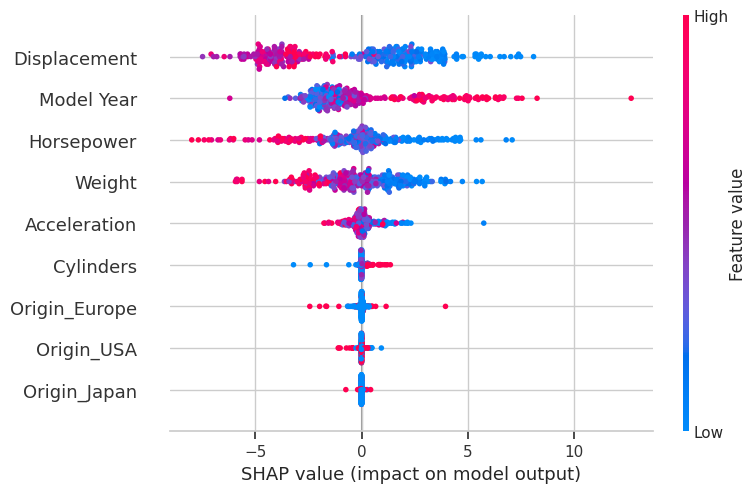

In [14]:
import shap

# Initialize the SHAP explainer object with the trained model and the training data
explainer = shap.Explainer(regression_tree, X_train)

# Compute SHAP values for all instances in the training set
shap_values = explainer.shap_values(X_train)

# Summarize the impact of each feature on the model predictions
shap.summary_plot(shap_values, X_train)


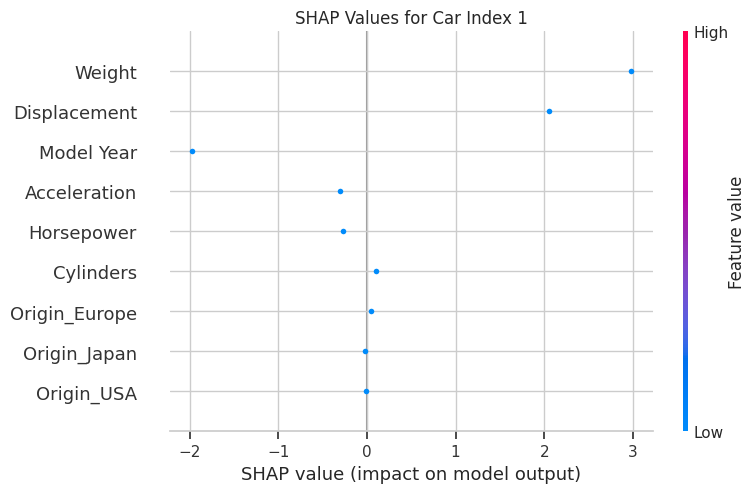

In [15]:
# Select one specific car from the training set
car_index = 1  # Index of the specific car
selected_car = X_train.iloc[[car_index]]

# Compute SHAP values for the selected car
shap_values_car = explainer.shap_values(selected_car)

# Plot the summary plot for SHAP values of the selected car
plt.title(f'SHAP Values for Car Index {car_index}')
shap.summary_plot(shap_values_car, selected_car)

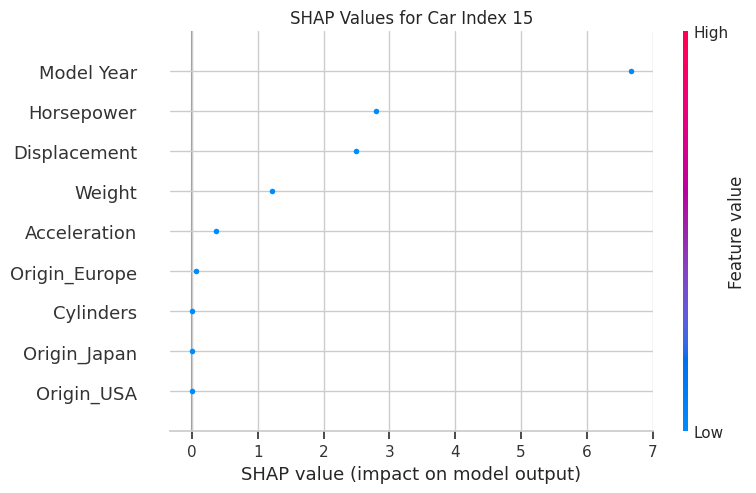

In [16]:
# Select one specific car from the training set
car_index = 15  # Index of the specific car
selected_car = X_train.iloc[[car_index]]

# Compute SHAP values for the selected car
shap_values_car = explainer.shap_values(selected_car)

# Plot the summary plot for SHAP values of the selected car
plt.title(f'SHAP Values for Car Index {car_index}')
shap.summary_plot(shap_values_car, selected_car)

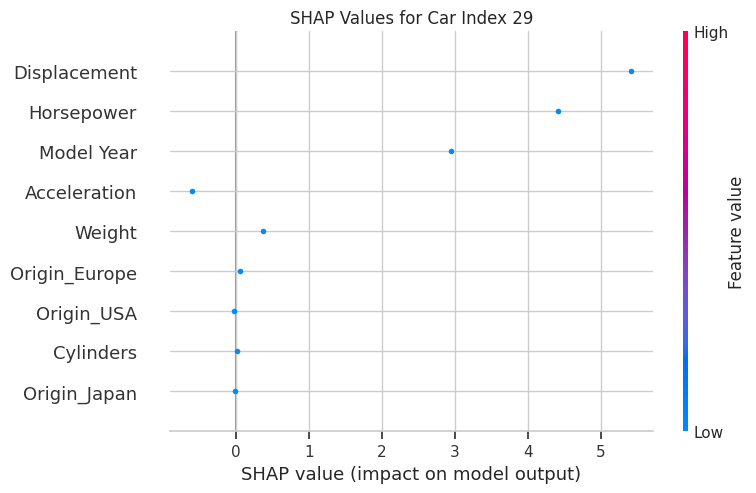

In [17]:
# Select one specific car from the training set
car_index = 29  # Index of the specific car
selected_car = X_train.iloc[[car_index]]

# Compute SHAP values for the selected car
shap_values_car = explainer.shap_values(selected_car)

# Plot the summary plot for SHAP values of the selected car
plt.title(f'SHAP Values for Car Index {car_index}')
shap.summary_plot(shap_values_car, selected_car)

## 2. Classification evaluation (15 points)

Submit question 2 as a PDF file with the calculations, graphs and explainations.

### ROC and precision recall curve (8 pts)

Calculate ROC curve and precision recall curve with the follwing tresholds: [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
The probabilities are:

| label | classifier 1 | classifier 2|
|--------|----------|---------------|
|1|0.41|1.00|
|0	|0.00	|0.72
|0	|0.00	|0.99
|1	|0.73	|0.14
|0	|0.62	|0.00
|1	|1.00	|0.94
|0	|1.00	|0.10
|1	|0.14	|0.77
|0	|0.00	|0.02
|1	|0.55	|1.00






Answer the following questions:
1. Which model is better based on those graphs?
2. If those models predict heart attack, choose a 'one threshold' metric (such as acc, precision, etc..) and explain why it's a suitable metric for this case.

### Curves differences (7 pts)

Create a new table with two columns: 'label' and 'predictions'. Fill the table with 10 rows of values representing binary labels and corresponding predicted probabilities.
Ensure that the values chosen for the predictions are deliberately selected to make the ROC curve and precision-recall curve look different - which means that according to one curve the model is good, and according to the second one it's bad.
After filling the table, draw both the ROC curve and precision-recall curve using the provided data.
Explain the values that you chose and the reason for the change.

## 3. Ensembel (40 pts)

### implement adaBoost (25 pts)
implement the adaboost algorithm from scratch, refer to the lecture slides for the algorithm 43.
you may add any helper functions if needed but make sure to add documentation if you do so.
note, the base_estimator in sklearn supports sample_weight, you may use it if you want to.

In [159]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

class AdaBoost:
    def __init__(self, n_estimators=50, base_estimator=None):
        self.n_estimators = n_estimators
        self.base_estimator = base_estimator
        self.estimators = []
        self.estimator_weights = []

    def fit(self, X, y):
        m = X.shape[0]
        sample_weights = np.full(m, (1 / m))

        for _ in range(self.n_estimators):
            estimator = self.base_estimator()
            estimator.fit(X, y, sample_weight=sample_weights)
            predictions = estimator.predict(X)
            error = self.calculate_error(sample_weights, y, predictions)
            estimator_weight = self.calculate_estimator_weight(error)
            sample_weights = self.update_sample_weights(sample_weights, estimator_weight, y, predictions)
            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)

    def calculate_error(self, sample_weights, y_true, y_pred):
        return np.sum(sample_weights * (y_pred != y_true))

    def calculate_estimator_weight(self, error):
        return 0.5 * np.log((1 / error) - 1)

    def update_sample_weights(self, sample_weights, estimator_weight, y_true, y_pred):
        return (sample_weights * np.exp(-estimator_weight * y_true * y_pred)) / np.sum(sample_weights * np.exp(-estimator_weight * y_true * y_pred))

    def predict(self, X):
        classifier_preds = np.array([estimator.predict(X) for estimator in self.estimators])
        weighted_preds = np.dot(self.estimator_weights, classifier_preds)
        return np.sign(weighted_preds)


### Model training
train the adaboost model using the synthetic data below, use the following base estimators n_estimators=3,5,10:
1. DecisionTreeClassifier with max_depth=1
2. DecisionTreeClassifier with max_depth=3
3. svm.SVC with kernel='linear'


In [160]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [164]:
y_transformed = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)


base_estimators_config = [
    {'estimator': DecisionTreeClassifier, 'params': {'max_depth': 1}},
    {'estimator': DecisionTreeClassifier, 'params': {'max_depth': 3}},
    {'estimator': SVC, 'params': {'kernel': 'linear'}}
]


n_estimators_options = [3, 5, 10]

accuracy_scores = {}
precision_scores = {}

for config in base_estimators_config:
    for n_estimators in n_estimators_options:
        depth = config['params'].get('max_depth', 'N/A')
        key = f"max_depth={depth}, n_estimators={n_estimators}"

        model = AdaBoost(n_estimators=n_estimators, base_estimator=lambda: config['estimator'](**config['params']))
        model.fit(X_train, y_train)

        predictions_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, predictions_test)
        precision_test = precision_score(y_test, predictions_test, pos_label=1)

        accuracy_scores[key] = accuracy_test
        precision_scores[key] = precision_test

results = {
    key: {'accuracy': accuracy_scores[key], 'precision': precision_scores[key]}
    for key in accuracy_scores
}


### Model comparison (5 pts)
compare the models using the following metrics:
1. accuracy
2. precision

In [165]:
# Display model performances
for model_name, metrics in results.items():
    print(f"{model_name}: accuracy = {metrics['accuracy']:.2f}, precision = {metrics['precision']:.2f}")

max_depth=1, n_estimators=3: accuracy = 0.70, precision = 0.73
max_depth=1, n_estimators=5: accuracy = 0.78, precision = 0.80
max_depth=1, n_estimators=10: accuracy = 0.81, precision = 0.81
max_depth=3, n_estimators=3: accuracy = 0.82, precision = 0.80
max_depth=3, n_estimators=5: accuracy = 0.86, precision = 0.85
max_depth=3, n_estimators=10: accuracy = 0.91, precision = 0.90
max_depth=N/A, n_estimators=3: accuracy = 0.87, precision = 0.83
max_depth=N/A, n_estimators=5: accuracy = 0.87, precision = 0.83
max_depth=N/A, n_estimators=10: accuracy = 0.87, precision = 0.83


### compare number of learners (10 pts)
Choose the best base estimator from the previous section.
Compare the effect of the number of learners on the models error on both the training set and validation set.
use n_estimators = [1,5,10,20,50,100] and plot the error rate for each number of learners.
discuss the results.

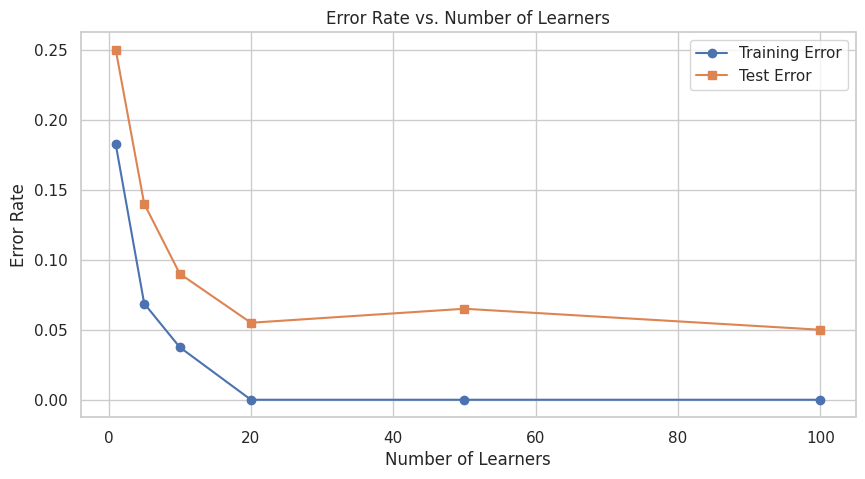

In [166]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming DecisionTreeClassifier with max_depth=1 is the best base estimator
best_base_estimator = lambda: DecisionTreeClassifier(max_depth=3)

n_estimators_list = [1, 5, 10, 20, 50, 100]
train_errors = []
test_errors = []

for n_estimators in n_estimators_list:
    model = AdaBoost(n_estimators=n_estimators, base_estimator=best_base_estimator)
    model.fit(X_train, y_train)

    # Compute training error
    predictions_train = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, predictions_train)
    train_errors.append(train_error)

    # Compute test error
    predictions_test = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, predictions_test)
    test_errors.append(test_error)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, train_errors, label='Training Error', marker='o')
plt.plot(n_estimators_list, test_errors, label='Test Error', marker='s')
plt.xlabel('Number of Learners')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Learners')
plt.legend()
plt.grid(True)
plt.show()


**Initial Decrease in Error Rate:** With a low number of learners, both training and validation error rates are decreasing sharply as more learners are added. This suggests that the initial models with very few learners are underfitting the dataset, and adding more learners quickly improves the model's ability to capture the underlying patterns in the data.

**Convergence of Error Rates:** As the number of learners increases, the training error continues to decrease, which is typical because the model becomes more complex and fits the training data better. However, the validation error rate plateaus and seems to converge to a certain value. This indicates that after a certain point, adding more learners does not significantly improve the model's performance on unseen data.

**Possible Overfitting:** The fact that the training error rate continues to decline while the validation error rate stops improving suggests that the model may be starting to overfit. Overfitting occurs when the model learns patterns that are specific to the training data, which do not generalize well to new data.

**Optimal Number of Learners:** From the plot, it seems that the optimal number of learners, where the validation error rate is at its lowest or before it starts to plateau, could be around 10 to 20. Beyond this range, the benefit of adding more learners diminishes, and the complexity of the model increases without a corresponding decrease in validation error.

## 4. SVM (10 points)

Submit question 4 in the pdf file.

### Find the SVM formula (6 pts)

Given the following points find and draw the SVM formula (hyperplane formula):

| x1 | x2 | class|
|--------|----------|---------------|
|1|6|-|
|1	|10	|-
|4	|11	|-
|6	|1	|+
|7	|6	|+
|10	|4	|+

### Margin size (4 pts)

Based on the hyperplane, calculate the margin size.